In [90]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import art3d
from scipy.special import factorial
from scipy.interpolate import griddata
from scipy.special import genlaguerre, sph_harm_y
from skimage.measure import marching_cubes

In [98]:
def generate_grid(r_max,sec):
    num_points = 500
    x = np.linspace(-r_max, r_max, num_points)
    y = np.linspace(-r_max, r_max, num_points)
    z = np.linspace(-r_max, r_max, num_points)
    if sec == 'xy':
        Z = 0
        X, Y = np.meshgrid(x, y)
        Theta = np.pi / 2
        Phi = np.arctan2(Y, X)
    elif sec == 'xz':
        Y = 0
        X, Z = np.meshgrid(x, z)
        Theta = np.arccos(np.divide(Z, np.sqrt(X**2 + Z**2), out=np.zeros_like(Z), where=(X**2 + Z**2)!=0))
        Phi = 0
    elif sec == 'yz':
        X = 0
        Y, Z = np.meshgrid(y, z)
        Theta = np.arccos(np.divide(Z, np.sqrt(Y**2 + Z**2), out=np.zeros_like(Z), where=(Y**2 + Z**2)!=0))
        Phi = np.pi / 2
    elif sec == '3d':
        X, Y, Z = np.meshgrid(x, y, z)
        R = np.sqrt(X**2 + Y**2 + Z**2)
        Theta = np.arccos(np.divide(Z, R, out=np.zeros_like(Z), where=R!=0))
        Phi = np.arctan2(Y, X)
        return R, Theta, Phi, (X, Y, Z)
    
    R = np.sqrt(X**2 + Y**2 + Z**2)
    return R, Theta, Phi, (X, Y, Z)

def radial_wavefunction(n, l, r):
    a0 = 1  # Bohr radius in atomic units
    rho = 2 * r / (n * a0)
    normalization = np.sqrt((2 / (n * a0))**3 * factorial(n - l - 1) / (2 * n * factorial(n + l)))
    laguerre_poly = genlaguerre(n - l - 1, 2 * l + 1)(rho)
    R_nl = normalization * rho**l * np.exp(-rho / 2) * laguerre_poly
    return R_nl

def angular_wavefunction(l, m, theta, phi):
    if m == 0:
        Y_lm = sph_harm_y(l, m, theta)
    elif m > 0:
        Y_lm = np.sqrt(2) * sph_harm_y(m, l, phi, theta).real
    else:
        Y_lm = np.sqrt(2) * sph_harm_y(-m, l, phi, theta).imag
    return Y_lm
    


In [99]:
def plot_section(sec, probability_density, n, l, m,r_max):
    fig, ax = plt.subplots(figsize=(8, 6),dpi = 300)
    ax.set_title(f'({sec}-plane) n={n}, l={l}, m={m}')
    c = ax.imshow(probability_density,extent=[-r_max, r_max, -r_max, r_max], origin='lower', cmap='viridis', interpolation='bilinear')
    fig.colorbar(c, ax=ax, label='Probability Density')
    ax.set_xlabel('X')
    ax.set_ylabel('Y' if sec == 'xy' else 'Z') 
    plt.show()

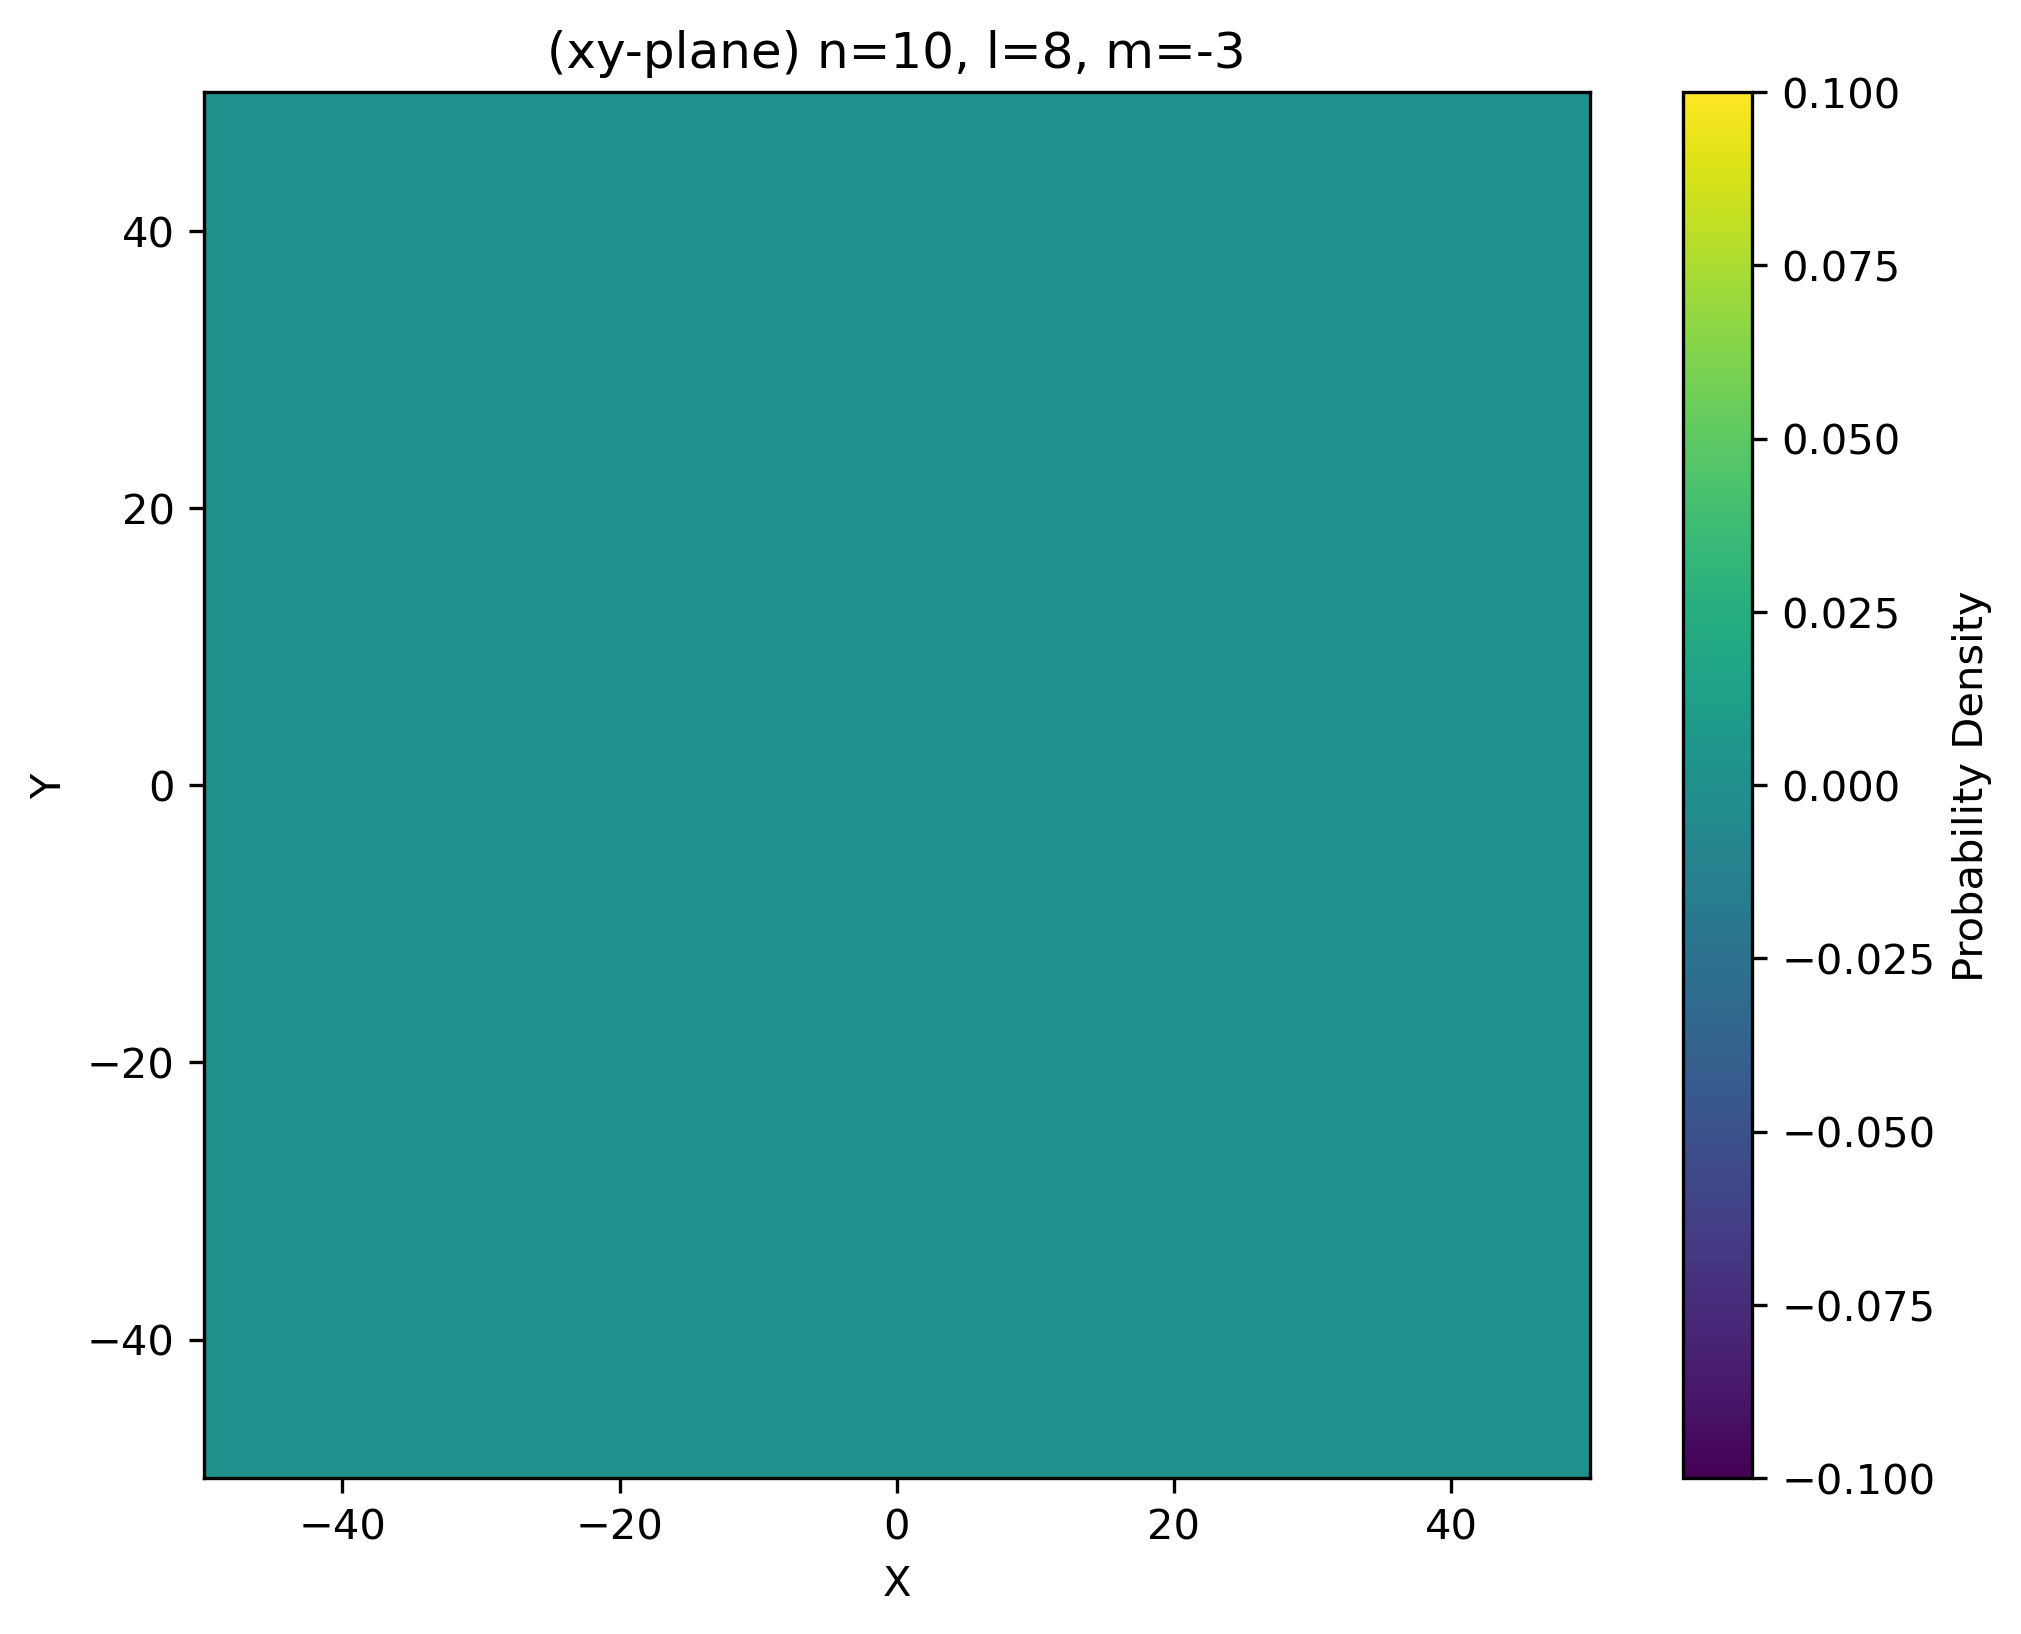

In [103]:
n, l, m = 10,8,-3
r_max = 50
R, Theta, Phi , (X, Y, Z) = generate_grid(r_max, 'yz')
R_nl = radial_wavefunction(n, l, R)
Y_lm = angular_wavefunction(l, m, Theta, Phi)
psi_nlm = R_nl * Y_lm
probability_density = np.abs(psi_nlm)**2
# np.save("psi_density.npy", probability_density)
plot_section('xy',probability_density,n,l,m,r_max)